Applications of KNN:

Herta Security uses deep learning algorithms to generate feature vectors representing people’s faces. They then use k-NN to identify a person by compare the face to their watchlist. The reason? k-NN is good enough and it’d be impractical to train a separate classifier for each person on the watchlist.<br>
The biggest use case of k-NN search might be Recommender Systems. If you know a user likes a particular item, then you can recommend similar items for them. To find similar items, you compare the set of users who like each item—if a similar set of users like two different items, then the items themselves are probably similar!

Import the required libraries

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing 
import math
from collections import Counter
from operator import itemgetter
%matplotlib inline

Load the data

In [65]:
data=pd.read_csv("Telco-Customer-Churn.csv")

Analyze the structure of data

In [66]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
data.shape

(7043, 21)

In [68]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [70]:
data=data.drop('customerID',1)

From the shape of the data it is understood that customer id in unique so we can drop it.

For encodings one hot encodings is used for normial variables with less number of unique values.(nominal)<BR>
Label encodings is used for strings with with more number of unique values.(ordinal)

In [71]:
label_encoder = preprocessing.LabelEncoder() 
data['PaymentMethod']= label_encoder.fit_transform(data['PaymentMethod']) 
data['MultipleLines']= label_encoder.fit_transform(data['MultipleLines']) 
data['InternetService']= label_encoder.fit_transform(data['InternetService']) 
data['OnlineSecurity']= label_encoder.fit_transform(data['OnlineSecurity']) 
data['OnlineBackup']= label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection']= label_encoder.fit_transform(data['DeviceProtection']) 
data['TechSupport']= label_encoder.fit_transform(data['TechSupport']) 
data['StreamingTV']= label_encoder.fit_transform(data['StreamingTV']) 
data['StreamingMovies']= label_encoder.fit_transform(data['StreamingMovies']) 
data['Contract']= label_encoder.fit_transform(data['Contract'])
#data['Churn']= label_encoder.fit_transform(data['Churn'])
data['TotalCharges']= label_encoder.fit_transform(data['TotalCharges'])

In [72]:
code_columns = ["gender","Partner","Dependents","PaperlessBilling","PhoneService"]
data=pd.get_dummies(data,prefix_sep="__",columns=code_columns)
print("Original Data Shape:",data.shape)
#print("One Hot Encoded:",one_hot_enc.shape)

Original Data Shape: (7043, 25)


We want to encode the object data type columns  to numerical use one hot or label encoding based on number of unique values .

In [73]:
data.loc[data.Churn == 'Yes', 'Churn'] = 1
data.loc[data.Churn == 'No', 'Churn'] = 0

In [75]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

Assign dependent columns and independent columns to separate variables.

User defined functions

In [76]:
def knn(x_train,y_train,x_test):
    #kvalue=list(data.shape)
    kv=1
    knn = KNeighborsClassifier(n_neighbors=kv)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    return y_pred
def knn_cv(x_train,y_train,x_test,k):
    kv=int(math.sqrt(k))
    knn=KNeighborsClassifier(n_neighbors=kv)
    scores=cross_val_score(knn,x_train, y_train, cv=10, scoring='accuracy')
    return scores.mean()
def split_train(x1,y1,size):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=size,random_state=0)
    return [x_train,x_test,y_train,y_test]
def plot_misclassfication(accuracy):
    cluster=[x for x in range(1,20,2)]
    mis_class=[1-x for x in accuracy]
    k_val=cluster[mis_class.index(min(mis_class))]
    print ("The optimal number of neighbors is %d" %k_val)
    plt.plot(cluster,mis_class)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()  

In [ ]:
Split data into train and test

In [77]:
res=split_train(x,y,0.25)
x_train=res[0]
x_test=res[1]
y_train=res[2]
y_test=res[3]

[0.91972256525358753, 0.91972256525358753, 0.89018527457382679, 0.89018527457382679, 0.91801514610744817, 0.91801514610744817, 0.91801514610744817, 0.91801514610744817, 0.910064526672695, 0.910064526672695]
The optimal number of neighbors is 1


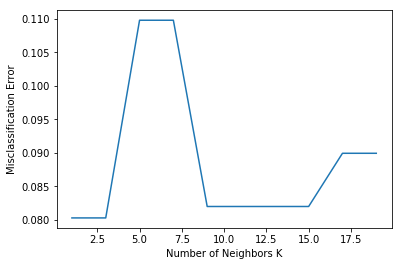

In [78]:
kneighbour=[knn_cv(x_train,y_train,x_test,x) for x in range(1,20,2)]
print(kneighbour)
plot_misclassfication(kneighbour)

Predict using knn model

In [79]:
pred=knn(x_train,y_train,x_test)

Accuracy: 0.923339011925
True Negative: 89
False Positive: 86
False Negative: 49
True Positive: 1537
             precision    recall  f1-score   support

          0       0.64      0.51      0.57       175
          1       0.95      0.97      0.96      1586

avg / total       0.92      0.92      0.92      1761

Area Under Curve is: 0.738838047199


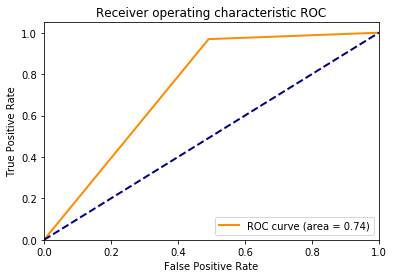

In [80]:
def metrics_calculations(y_test,y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
    tn,fp,fn,tp=metrics.confusion_matrix(y_test, y_pred).ravel()
    print("True Negative:",tn)
    print("False Positive:",fp)
    print("False Negative:",fn)
    print("True Positive:",tp)
    print(metrics.classification_report(y_test, y_pred))
    k=metrics.roc_curve(y_test,y_pred)
    #print(k)
    plt.figure()
    lw = 2
    print("Area Under Curve is:",metrics.auc(k[0],k[1]))
    plt.plot(k[0],k[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)'%metrics.auc(k[0],k[1]))
    plt.plot([0, 1], [0, 1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ROC')
    plt.legend(loc="lower right")
    plt.show()
metrics_calculations(y_test,pred)

The accuracy of knn model is 92.3% with area under curve is 74%

Accuracy: 1.0
True Negative: 175
False Positive: 0
False Negative: 0
True Positive: 1586
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       175
          1       1.00      1.00      1.00      1586

avg / total       1.00      1.00      1.00      1761

Area Under Curve is: 1.0


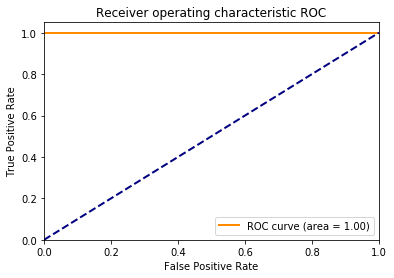

In [81]:
def logistic_regression(x_train,y_train,x_test):
    model_log=LogisticRegression()
    model_log.fit(x_train,y_train)
    y_pred=model_log.predict(x_test)
    return y_pred
pred=logistic_regression(x_train,y_train,x_test)
metrics_calculations(y_test,pred)

On comparing knn with logistic ,it has 100% accuracy it can be overfit so we can use knn.

KNN Implemented from scratch

Load and analyze the iris data

In [82]:
iris_data=pd.read_csv('Iris.csv')

In [83]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [84]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [85]:
iris_data=iris_data.drop('Id',1)

In [86]:
x=iris_data.iloc[:,:-1]
y=iris_data.iloc[:,-1]

In [87]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Read values for which prediction is to be done

In [88]:
seplen=float(input("Enter Value for Sepal Length cm:"))
sepwid=float(input("Enter Value for Sepal Widthcm:"))
petlen=float(input("Enter Value for Petal Length cm:"))
petwid=float(input("Enter Value for Petal Width cm:"))
pred_data=[seplen,sepwid,petlen,petwid]

Enter Value for Sepal Length cm:7
Enter Value for Sepal Widthcm:8
Enter Value for Petal Length cm:9
Enter Value for Petal Width cm:10


User Defined Functions

In [89]:
def distance(data_iter,pred_data):
    dist=0
    for k in range (len(data_iter)):
        dist=dist+((data_iter[k]-pred_data[k])**2)
        return dist
def predict_knn(result,k):
    sorted(result, key=itemgetter(0))
    result=result[:k]
    res= list(map(itemgetter(1),result))
    most_common,num_most_common = Counter(res).most_common(1)[0] 
    print("The prediction  for given data point is",most_common)
    print("It was present ",num_most_common," Out of ",k)

In [90]:
result=[]
for i in range (len(x)):
    data_iter=list(x.iloc[i,:].values)
    #print(data_iter)
    res=distance(data_iter,pred_data)
    result.append([res,y.iloc[i]])
print("K value should be less than",iris_data.shape[0])
k=int(input("Enter Value for K:"))
if k>iris_data.shape[0]:
    k=iris_data.shape[0]
    print("Changed K value:",k)
predict_knn(result,k)

K value should be less than 150
Enter Value for K:100
The prediction  for given data point is Iris-setosa
It was present  50  Out of  100
